# HTA: Face Mask Detection Project

# Data Preprocessing

In [18]:
import cv2,os

dataset_path = 'F:\My_Disk\lectures\MSc Amritra\Sem 3\Deeplearning\HTA-Project\dataset'
categories = os.listdir(dataset_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)


{'no mask': 0, 'with mask': 1}
['no mask', 'with mask']
[0, 1]


In [19]:
img_size = 100
data = []
target = []


for category in categories:
    folder_path = os.path.join(dataset_path,category)
    img_names = os.listdir(folder_path)
        
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        

        try:
            if(img is not None):
                gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
                #Coverting the image into gray scale
                resized=cv2.resize(gray,(img_size,img_size))
                #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                target.append(label_dict[category])
                #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


In [20]:
import numpy as np
from numpy import save
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils

new_target = np_utils.to_categorical(target)

In [21]:
save('data.npy',data)
save('target.npy',new_target)

In [22]:
data=np.load('data.npy')
target=np.load('target.npy')

# Model 

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.25)


In [25]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
trained_model = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 0.7552 - accuracy: 0.5312

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


30/30 [==============================] - 61s 2s/step - loss: 0.7552 - accuracy: 0.5312 - val_loss: 0.6769 - val_accuracy: 0.4979
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 0.6161 - accuracy: 0.6508

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


30/30 [==============================] - 72s 2s/step - loss: 0.6161 - accuracy: 0.6508 - val_loss: 0.4657 - val_accuracy: 0.7890
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.7831

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


30/30 [==============================] - 85s 3s/step - loss: 0.4406 - accuracy: 0.7831 - val_loss: 0.3131 - val_accuracy: 0.8945
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8593

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


30/30 [==============================] - 86s 3s/step - loss: 0.3226 - accuracy: 0.8593 - val_loss: 0.2840 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.8974

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


30/30 [==============================] - 78s 3s/step - loss: 0.2658 - accuracy: 0.8974 - val_loss: 0.2104 - val_accuracy: 0.9325
Epoch 6/20
30/30 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.9058

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


30/30 [==============================] - 63s 2s/step - loss: 0.2153 - accuracy: 0.9058 - val_loss: 0.1862 - val_accuracy: 0.9367
Epoch 7/20
30/30 [==============================] - ETA: 0s - loss: 0.1757 - accuracy: 0.9238

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


30/30 [==============================] - 58s 2s/step - loss: 0.1757 - accuracy: 0.9238 - val_loss: 0.1769 - val_accuracy: 0.9451
Epoch 8/20
30/30 [==============================] - ETA: 0s - loss: 0.1488 - accuracy: 0.9323

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


30/30 [==============================] - 57s 2s/step - loss: 0.1488 - accuracy: 0.9323 - val_loss: 0.1542 - val_accuracy: 0.9325
Epoch 9/20
30/30 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9503

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


30/30 [==============================] - 64s 2s/step - loss: 0.1228 - accuracy: 0.9503 - val_loss: 0.1353 - val_accuracy: 0.9536
Epoch 10/20
30/30 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.9577

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


30/30 [==============================] - 78s 3s/step - loss: 0.1082 - accuracy: 0.9577 - val_loss: 0.1304 - val_accuracy: 0.9409
Epoch 11/20
30/30 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9735

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


30/30 [==============================] - 79s 3s/step - loss: 0.0787 - accuracy: 0.9735 - val_loss: 0.1137 - val_accuracy: 0.9451
Epoch 12/20
30/30 [==============================] - 75s 2s/step - loss: 0.0508 - accuracy: 0.9852 - val_loss: 0.1408 - val_accuracy: 0.9451
Epoch 13/20
30/30 [==============================] - 75s 2s/step - loss: 0.0685 - accuracy: 0.9704 - val_loss: 0.1306 - val_accuracy: 0.9451
Epoch 14/20
30/30 [==============================] - 73s 2s/step - loss: 0.0439 - accuracy: 0.9905 - val_loss: 0.1306 - val_accuracy: 0.9536
Epoch 15/20
30/30 [==============================] - 74s 2s/step - loss: 0.0458 - accuracy: 0.9810 - val_loss: 0.1301 - val_accuracy: 0.9536
Epoch 16/20
30/30 [==============================] - 73s 2s/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.1304 - val_accuracy: 0.9409
Epoch 17/20
30/30 [==============================] - 73s 2s/step - loss: 0.0244 - accuracy: 0.9915 - val_loss: 0.1423 - val_accuracy: 0.9578
Epoch 18/20
30/30 [======

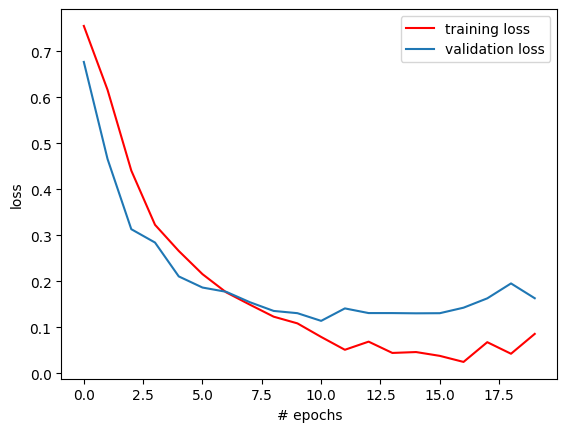

In [26]:
from matplotlib import pyplot as plt

plt.plot(trained_model.history['loss'],'r',label='training loss')
plt.plot(trained_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


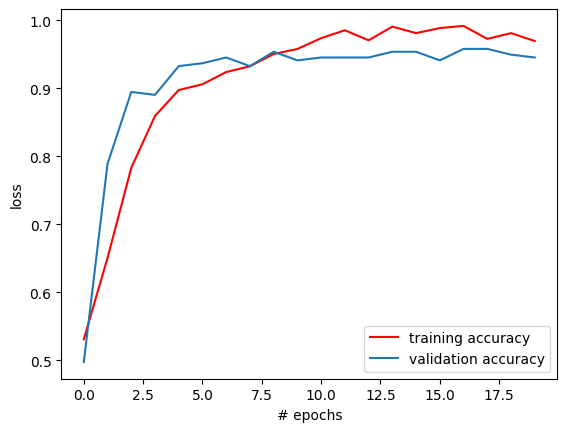

In [27]:
plt.plot(trained_model.history['accuracy'],'r',label='training accuracy')
plt.plot(trained_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 8s 605ms/step - loss: 0.2870 - accuracy: 0.9190
[0.28697076439857483, 0.9189873337745667]


In [29]:
model.save("mask_detector.model", save_format="h5")

In [30]:
# from sklearn.metrics import classification_report, confusion_matrix
# cnf_matrix = confusion_matrix(train_target, test_target, labels=[0,1])
# np.set_printoptions(precision=2)

# print (classification_report(train_target, test_target))

# import seaborn as sns

# ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n')
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('\nActual Values ')

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['1: Mask', '0: No Mask'])
# ax.yaxis.set_ticklabels(['1: Mask','0: No Mask'])

# ## Display the visualization of the Confusion Matrix.

# plt.show()